In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('eda_data.csv')

In [3]:
#choose relevant columns
df.columns
df_columns = df[['Rating', 'Size','Type of ownership', 'Industry','Sector', 'Revenue','num_comp',
              'job_state', 'same_state','employer_provided', 'hourly','age', 'python_yn','spark', 'aws', 'excel',
              'job_simp', 'seniority','avg_salary','job_desc']]

In [4]:
#get dummy data
df_dum = pd.get_dummies(df_columns)
df_dum

Rating  num_comp  same_state  employer_provided  hourly  age  python_yn  \
0       3.8         0           0                  0       0   47          1   
1       3.4         0           0                  0       0   36          1   
2       4.8         0           1                  0       0   10          1   
3       3.8         3           1                  0       0   55          1   
4       2.9         3           1                  0       0   22          1   
..      ...       ...         ...                ...     ...  ...        ...   
737     3.9         3           0                  0       0  190          0   
738     4.4         3           0                  0       0   14          1   
739     2.6         0           1                  0       0   36          0   
740     3.2         0           0                  0       0   -1          0   
741     3.6         0           0                  0       0   53          1   

     spark  aws  excel  ...  job_simp_analyst  job_simp_data engineer  \
0        0    0      1  ...                 0                       0   
1        0    0      0  ...                 0                       0   
2        1    0      1  ...                 0                       0   
3        0    0      0  ...                 0                       0   
4        0    0      1  ...                 0                       0   
..     ...  ...    ...  ...               ...                     ...   
737      0    1      0  ...                 0                       0   
738      1    1      0  ...                 0                       1   
739      0    0      1  ...                 0                       0   
740      0    0      1  ...                 0                       0   
741      0    0      0  ...                 0                       0   

     job_simp_data scientist  job_simp_director  job_simp_manager  \
0                          1                  0                 0   
1                          1                  0                 0   
2                          1                  0                 0   
3                          1                  0                 0   
4                          1                  0                 0   
..                       ...                ...               ...   
737                        0                  0                 0   
738                        0                  0                 0   
739                        0                  0                 0   
740                        0                  0                 1   
741                        0                  0                 0   

     job_simp_mle  job_simp_na  seniority_junior  seniority_na  \
0               0            0                 0             1   
1               0            0                 0             1   
2               0            0                 0             1   
3               0            0                 0             1   
4               0            0                 0             1   
..            ...          ...               ...           ...   
737             0            1                 0             0   
738             0            0                 0             0   
739             0            1                 0             1   
740             0            0                 0             1   
741             0            1                 0             1   

     seniority_senior  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
..                ...  
737                 1  
738                 1  
739                 0  
740                 0  
741                 0  

[742 rows x 178 columns]

In [5]:
from sklearn.model_selection import train_test_split
X = df_dum.drop('avg_salary', axis=1)
Y = df_dum.avg_salary.values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=42)

In [6]:
#train test split- train, validate, test
import statsmodels.api as sm

X_sm = X =sm.add_constant(X)
model = sm.OLS(Y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     9.323
Date:                Wed, 05 Aug 2020   Prob (F-statistic):           4.13e-87
Time:                        20:25:15   Log-Likelihood:                -3335.3
No. Observations:                 742   AIC:                             6957.
Df Residuals:                     599   BIC:                             7616.
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                42.5407      6.607      6.439      0.000      29.565      55.517
Rating                                                3.3723      1.999      1.687      0.092      -0.553       7.297
num_comp                                              2.2423      0.897      2.499      0.013       0.480       4.004
same_state                                            2.2950      2.704      0.849      0.396      -3.015       7.605
employer_provided                                    39.8210     11.824      3.368      0.001      16.600      63.042
hourly                                              -44.7549      9.412     -4.755      0.000     -63.238     -26.271
age                                                   0.0349      0.031      1.119      0.264      -0.026       0.096
python_yn                                             8.1303      2.605      3.121      0.002       3.014      13.247
spark                                                -1.8020      3.008     -0.599      0.549      -7.709       4.105
aws                                                   1.9983      2.821      0.708      0.479      -3.543       7.539
excel                                                -0.6540      2.343     -0.279      0.780      -5.255       3.947
job_desc                                          -1.757e-05      0.001     -0.022      0.982      -0.002       0.002
Size_-1                                              10.6309      8.896      1.195      0.233      -6.841      28.102
Size_1 to 50 employees                                0.9499      6.698      0.142      0.887     -12.205      14.104
Size_10000+ employees                                 0.5556      5.998      0.093      0.926     -11.224      12.335
Size_1001 to 5000 employees                           6.1977      4.007      1.547      0.122      -1.671      14.067
Size_201 to 500 employees                             2.5959      3.992      0.650      0.516      -5.243      10.435
Size_5001 to 10000 employees                         -1.9295      5.608     -0.344      0.731     -12.943       9.084
Size_501 to 1000 employees                            3.2178      4.183      0.769      0.442      -4.997      11.433
Size_51 to 200 employees                              5.3623      4.543      1.180      0.238      -3.559      14.284
Size_Unknown                                         14.9602     14.431      1.037      0.300     -13.382      43.302
Type of ownership_-1                                 10.6309      8.896      1.195      0.233      -6.841      28.102
Type of ownership_College / University               -1.6441     18.267     -0.090      0.928     -37.518      34.230
Type of ownersh

In [7]:
#multiple linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
lm.fit(X_train, Y_train)
cross_val_score(lm, X_train, Y_train, scoring = 'neg_mean_absolute_error', cv=3)
np.mean(cross_val_score(lm, X_train, Y_train, scoring = 'neg_mean_absolute_error', cv=3))

-272324556.96619385

alpha      error
0    0.1 -19.897087

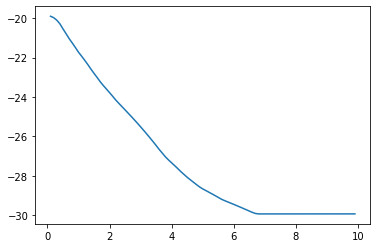

In [22]:
#lasso regression
from sklearn.linear_model import Lasso
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,Y_train)
np.mean(cross_val_score(lm_l, X_train, Y_train, scoring = 'neg_mean_absolute_error', cv=3))

alpha = []
error = []
for i in range(1,100):
    alpha.append(i/10)
    lml = Lasso(alpha=(i/10))
    error.append(np.mean(cross_val_score(lml, X_train, Y_train, scoring = 'neg_mean_absolute_error', cv=3)))
    
plt.plot(alpha, error)
err = tuple(zip(alpha, error))
df_err = pd.DataFrame(err, columns= ['alpha', 'error'])
df_err[df_err.error == max(df_err.error)]

In [23]:
#random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf, X_train, Y_train, scoring = 'neg_mean_absolute_error', cv=3))

-15.35142238800868

In [24]:
#tune models using GridSearchCV
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10),'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}
gs = GridSearchCV(rf, parameters, scoring = 'neg_mean_absolute_error', cv=3)
gs.fit(X_train, Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [31]:
gs.best_score_

-15.257150110809164

In [32]:
gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=60, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [33]:
#test ensemble
#use these different models to see predict the test set data
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [35]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test, tpred_lm)


19.60442264071582

In [36]:
mean_absolute_error(Y_test, tpred_lml)


20.292933635789854

In [37]:
mean_absolute_error(Y_test, tpred_rf)

11.481040268456377

In [38]:
(tpred_lm+tpred_rf)/2

array([114.01996601,  52.00833333, 135.74416076, 115.88638399,
       150.59936877, 132.56008386, 139.11041217,  40.13168347,
        50.79084046,  77.89553734, 155.77926651,  68.33707366,
       112.98624024, 123.43171394,  74.42159597, 141.96106379,
        65.13728321,  62.70946257, 120.96941056,  91.60324359,
       111.98512647, 130.67439994, 149.17843165, 109.34692748,
       138.06332054, 101.69035079,  69.35620501, 141.53790084,
       101.82163976, 106.28167858,  83.81205959,  54.85509221,
       132.32171713, 108.03634602, 104.87547503,  88.4488206 ,
        78.10595059, 113.29762105,  63.24079488, 121.02108635,
       188.06711239, 113.95714621,  85.95230883,  90.61086936,
       151.71668236,  87.06781618, 146.58141915, 122.17863031,
       136.69606266,  97.54780035, 120.85659446,  99.5219047 ,
        90.77921044, 100.55683428,  91.14044889, 131.96986109,
        85.95230883,  81.07430903, 205.77975378, 130.13493243,
       122.42035261, 110.7468176 , 119.83594932, 143.81

In [40]:
mean_absolute_error(Y_test, (tpred_lm+tpred_rf)/2)

14.58594393191225